In [19]:
! pip install tensorflow

     |████████████████████████████████| 175.3 MB 44 kB/s s eta 0:00:01
     |████████████████████████████████| 2.8 MB 315 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 1.3 MB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 63 kB 5.5 MB/s  eta 0:00:01
     |████████████████████████████████| 3.0 MB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 454 kB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 777 kB 35.4 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 

In [135]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import RobustScaler
import matplotlib.patches as mpatches
import time
warnings.filterwarnings("ignore")

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings

In [138]:
! pip install imblearn

In [139]:
dat=pd.read_csv('/Users/jennyyang/Downloads/creditcard.csv')

dat.head

In [140]:
dat.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [141]:
dat.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [142]:
dat.isnull().sum().max()

0

Since no null values, there's not need to do imputation.

In [143]:
print('Not Frauds', round(dat['Class'].value_counts()[0]/len(dat) * 100,2),'%')
print('Frauds', round(dat['Class'].value_counts()[1]/len(dat) * 100,2), '%')

Not Frauds 99.83 %
Frauds 0.17 %


Since Fruads are rare event hence data is inbalanced, this issue will be addressed later.

In [144]:
r_scaler = RobustScaler()
dat['scaled_amount'] = r_scaler.fit_transform(dat['Amount'].values.reshape(-1,1))
dat['scaled_time'] = r_scaler.fit_transform(dat['Time'].values.reshape(-1,1))
dat.drop(['Time','Amount'], axis=1, inplace=True)

In [145]:
scaled_amount = dat['scaled_amount']
scaled_time = dat['scaled_time']
dat.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
dat.insert(0, 'scaled_amount', scaled_amount)
dat.insert(1, 'scaled_time', scaled_time)

Per data description, V1 to V28 was generated by the principle component analysis through the varibale decompistion process; but Time and Amount are not tranformed therefore need to be scaled.

In [146]:
dat.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
X = dat.drop('Class', axis=1)
Y = dat['Class']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, stratify=Y, random_state=42)

In [148]:
print('Training: Not Frauds', round(y_train.value_counts()[0]/len(y_train) * 100,2),'%')
print('Training: Frauds', round(y_train.value_counts()[1]/len(y_train) * 100,2), '%')
print('Testing: Not Frauds', round(y_test.value_counts()[0]/len(y_test) * 100,2),'%')
print('Testing: Frauds', round(y_test.value_counts()[1]/len(y_test) * 100,2),'%')

Training: Not Frauds 99.83 %
Training: Frauds 0.17 %
Testing: Not Frauds 99.83 %
Testing: Frauds 0.17 %


checking frauds and non-frauds rate to make sure the percentage is the same with original data set after splitting.

As mentioned above, the data is highly inbalanced; therefore, in order to make sure model can catch fraud, data need to be further manipulated, for example: under sampling or SMOTE

In [149]:
x_train['Class']=y_train
dat1 = x_train.sample(frac=1,random_state=42)
dat1.head()
fraud_dat1 = dat1.loc[dat1['Class'] == 1]
print(len(fraud_dat1))
non_fraud_dat1 = dat1.loc[dat1['Class'] == 0][:443]
normal_distributed_dat1 = pd.concat([fraud_dat1, non_fraud_dat1])
new_dat = normal_distributed_dat1.sample(frac=1, random_state=42)

443


The above undersampling method suffled the 90% training data to make sure the undersampling is a ramdoming sampling from the non_fraud data set. Since the data now is suffle and knowing that there are 443 cases of frauds, choose the 442 cases from the non_fraud data to make the two set balanced.

In [150]:
print(new_dat['Class'].value_counts()/len(new_dat))
X = new_dat.drop('Class', axis=1)
Y = new_dat['Class']

x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=42)

1    0.5
0    0.5
Name: Class, dtype: float64


In [151]:
print('Training: Not Frauds', round(y_train.value_counts()[0]/len(y_train) * 100,2),'%')
print('Training: Frauds', round(y_train.value_counts()[1]/len(y_train) * 100,2), '%')
print('Validation: Not Frauds', round(y_val.value_counts()[0]/len(y_val) * 100,2),'%')
print('Validation: Frauds', round(y_val.value_counts()[1]/len(y_val) * 100,2),'%')

Training: Not Frauds 50.0 %
Training: Frauds 50.0 %
Validation: Not Frauds 50.0 %
Validation: Frauds 50.0 %


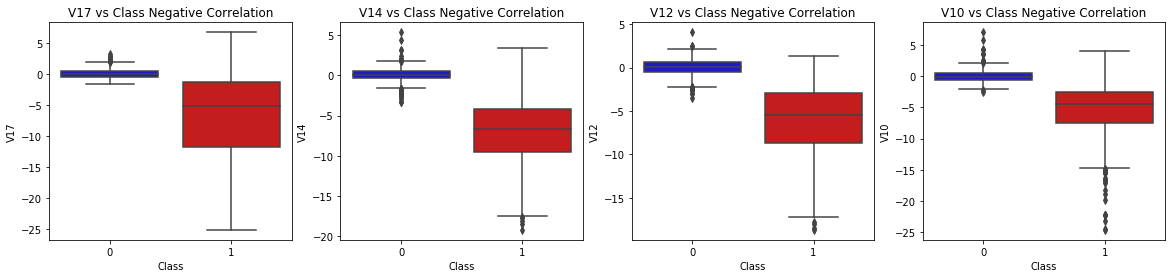

In [152]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
colors = ["#0101DF", "#DF0101"]

sns.boxplot(x="Class", y="V17", data=new_dat, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_dat, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_dat, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_dat, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()


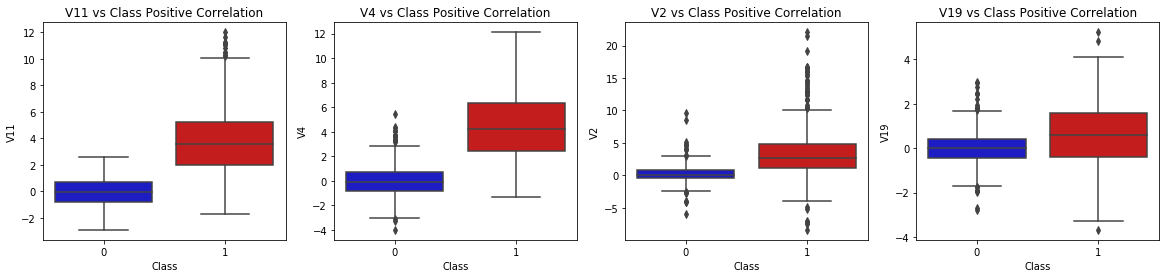

In [153]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_dat, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_dat, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_dat, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_dat, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [154]:
new_dat_t=new_dat.drop("V19",axis=1)
new_dat_t.columns

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Class'],
      dtype='object')

Since the boxplot of V19 shows that the Fraud and Non-fraud cases show noticable correlation, this variable could be interfere the model performance therefore needs to be droped.

In [155]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [156]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_val, y_val, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 88.0 % accuracy score


In [157]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression Model
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train, y_train)
log_reg = grid_log_reg.best_estimator_



# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)

tree_clf = grid_tree.best_estimator_

Use GridSearchCV to tune the hyperparameters in order to get the best model performance

In [158]:
log_reg_score = cross_val_score(log_reg, x_val, y_val, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, x_val, y_val, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.81%
DecisionTree Classifier Cross Validation Score 88.79%


In [159]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, x_val, y_val, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, x_val, y_val, cv=5)



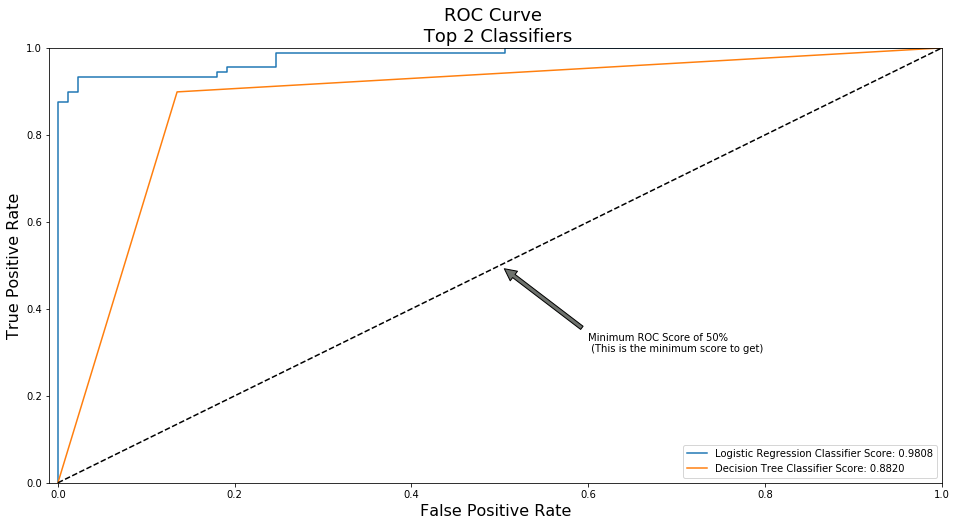

In [160]:
log_fpr, log_tpr, log_thresold = roc_curve(y_val, log_reg_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_val, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 2 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_val, log_reg_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_val, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, tree_fpr, tree_tpr)
plt.show()

In [161]:
print('Logistic Regression: ', roc_auc_score(y_val, log_reg_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_val, tree_pred))

Logistic Regression:  0.9808105037242772
Decision Tree Classifier:  0.8820224719101123


From the validation of the models, Logistic Regression have high ROC score than Decision Tree Classifier, which could have better chance catching frauds.

In [162]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
X = dat.drop('Class', axis=1)
Y = dat['Class']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, stratify=Y, random_state=42)

In [163]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(x_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(x_val), len(y_val)))

Length of X (train): 256326 | Length of y (train): 256326
Length of X (test): 178 | Length of y (test): 178


In [164]:
X_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)
print('Training: Not Frauds', round(y_resampled.value_counts()[0]/len(y_resampled) * 100,2),'%')
print('Training: Frauds', round(y_resampled.value_counts()[1]/len(y_resampled) * 100,2), '%')

Training: Not Frauds 50.0 %
Training: Frauds 50.0 %


In [165]:
print('Training: Not Frauds', round(y_resampled.value_counts()[0]/len(y_resampled) * 100,2),'%')
print('Training: Frauds', round(y_resampled.value_counts()[1]/len(y_resampled) * 100,2), '%')

Training: Not Frauds 50.0 %
Training: Frauds 50.0 %


In [166]:
X=X_resampled
Y=y_resampled
x_train,x_val,y_train,y_val=train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=42)

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 99.0 % accuracy score
Logistic Regression Cross Validation Score:  95.0%
DecisionTree Classifier Cross Validation Score 93.48%


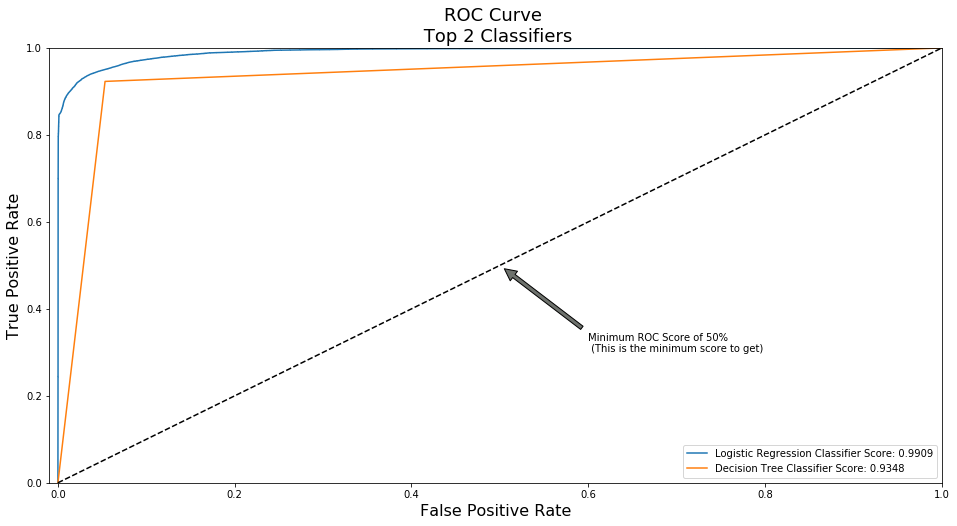

Logistic Regression:  0.9908967246175582
Decision Tree Classifier:  0.9348340074642906


In [167]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_val, y_val, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    
    
    
# Oversampling (SMOTE) Logistic Regression model
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg_smote = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg_smote.fit(x_train, y_train)

log_reg_smote = grid_log_reg_smote.best_estimator_



# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree_smote = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree_smote.fit(x_train, y_train)


tree_clf_smote = grid_tree_smote.best_estimator_

log_reg_score = cross_val_score(log_reg_smote, x_val, y_val, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf_smote, x_val, y_val, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

log_reg_pred = cross_val_predict(log_reg_smote, x_val, y_val, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf_smote, x_val, y_val, cv=5)

log_fpr, log_tpr, log_thresold = roc_curve(y_val, log_reg_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_val, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 2 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_val, log_reg_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_val, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, tree_fpr, tree_tpr)
plt.show()


print('Logistic Regression: ', roc_auc_score(y_val, log_reg_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_val, tree_pred))

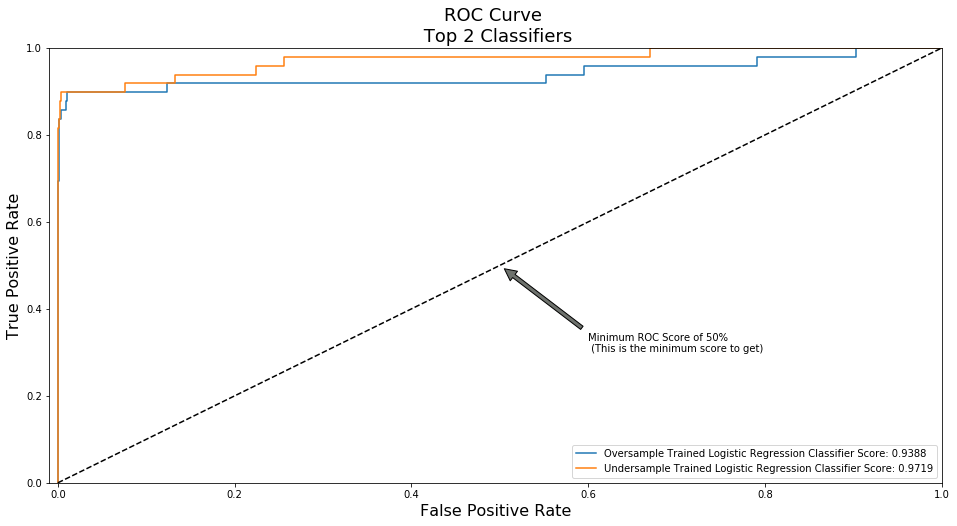

Oversample Trained Logistic Regression:  0.938763307799203
Undersample Trained Logistic Regression:  0.9719409288757709


In [168]:
log_reg_pred_over = cross_val_predict(log_reg_smote, x_test, y_test, cv=5,
                             method="decision_function")

log_reg_pred_under = cross_val_predict(log_reg, x_test, y_test, cv=5,
                             method="decision_function")


log_over_fpr, log_over_tpr, log_over_thresold = roc_curve(y_test, log_reg_pred_over)
log_under_fpr, log_under_tpr, log_under_thresold = roc_curve(y_test, log_reg_pred_under)


def graph_roc_curve_multiple(log_over_fpr, log_over_tpr, log_under_fpr, log_under_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 2 Classifiers', fontsize=18)
    plt.plot(log_over_fpr, log_over_tpr, label='Oversample Trained Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred_over)))
    plt.plot(log_under_fpr, log_under_tpr, label='Undersample Trained Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test,log_reg_pred_under)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_over_fpr, log_over_tpr, log_under_fpr, log_under_tpr)
plt.show()


print('Oversample Trained Logistic Regression: ', roc_auc_score(y_test, log_reg_pred_over))
print('Undersample Trained Logistic Regression: ', roc_auc_score(y_test, log_reg_pred_under))

The ROC curve show logistic rgeression with undersampling does a better job catching frauds than the oversampling method. 

Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.76')

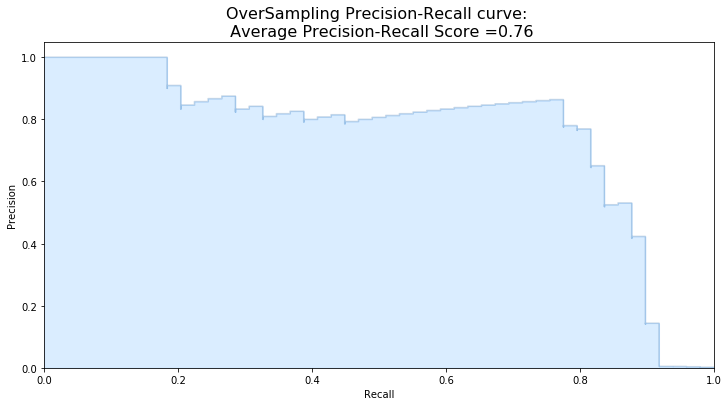

In [169]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

oversample_y_score = log_reg_smote.decision_function(x_test)
oversample_average_precision = average_precision_score(y_test, oversample_y_score)


precision_over, recall_over, _ = precision_recall_curve(y_test, oversample_y_score)

plt.step(recall_over, precision_over, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall_over, precision_over, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          oversample_average_precision), fontsize=16)

Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.49')

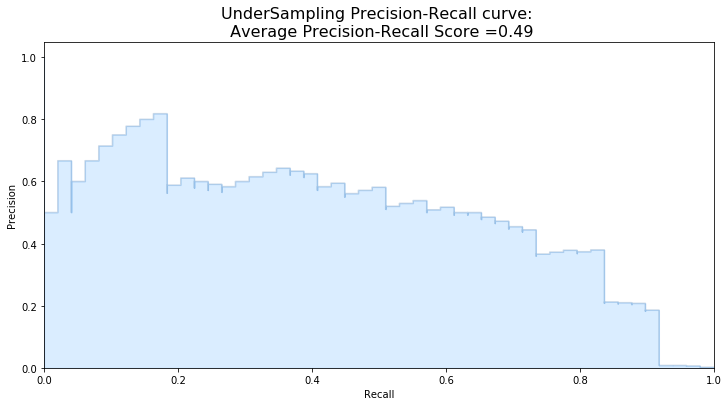

In [170]:
fig = plt.figure(figsize=(12,6))

undersample_y_score = log_reg.decision_function(x_test)
undersample_average_precision = average_precision_score(y_test, undersample_y_score)


precision_under, recall_under, _ = precision_recall_curve(y_test, undersample_y_score)

plt.step(recall_under, precision_under, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall_under, precision_under, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

The Precision-Recall curve gives a different conclusion than the ROC curve, the Average Precision-Recall score for Oversampling is much higher than undersampling. ROC curve takes Ture negative into consideration, which happens to fit the inbalanced data (most cases are non-fraud), so ROC curve could overestimate the performance of the undersampling mehtod model. Precision-Recall is better in this case for Presicion calculate the rate of hitting the ture-fraud transaction over the total hit cases; and Recall calculate the rate of hitting the true-fraud transaction over the toal fraud cases. Therefore the model trained with oversampling method might have a better performance when come across highly inbalanced data like this.